In [1]:
# importar librerias y datos 
#from google.colab import drive
#drive.mount('/content/gdrive')

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
archivo = 'C:/Users/User/Desktop/ProyectoU2/Proyecto/car_prices.csv'
#Se utiliza para no mostrar lineas con datos erróneos
datos = pd.read_csv(archivo, error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw

Le analizamos la informacion del dataset para determinar la cantidad de valores y los valores nulos y el tipo de dato, ya sea numero caracteres

In [3]:
datos

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [4]:
datos.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.4,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,white,black,audi mission viejo,32100,32250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [5]:
#Muestra los diferentes valores que se encuentra en la columna
datos.nunique()

year                34
make                96
model              973
trim              1975
body                86
transmission         2
vin             550296
state               38
condition           41
odometer        172277
color               20
interior            17
seller           14264
mmr               1101
sellingprice      1887
saledate          3745
dtype: int64

In [6]:
#Muestra las 16 caracteristicas que tiene el dataset 
#(non-null que cuenta los valores no nulos, dytipe= muestra el tipo de variables )
#transformacion de datos categoricos a numericos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Verificamos la cantidad de valores nulos en el dataset

In [7]:
#Muestra la cantidad de valores que estan vacios o nulos 
#Identificar los valores nulos para rellenar los dataset se aplica los promedios o medias
datos.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Aquellos en los que existen valores nulos llenamos con la media de la informacion asi no perdemos datos 

In [8]:
#Rellena los valores nulos de las columnas o la medias de las columnas 
datos['odometer'].fillna(datos['odometer'].mean(), inplace=True)
#condicion :  las demas no se cambia por las variables categoricas
datos['condition'].fillna(datos['condition'].mean(), inplace=True)
datos.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [9]:
#Es para guardar y eliminar las variables nulos
datos_1= datos.dropna()

In [10]:
#Se vuelve a correr la variable insnull para determinar si existe aun datos nulos
datos_1.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Limpiamos el data set de las colunmas que no aportan infromacion relevante

In [11]:
#Es para eliminar las columnas correspondiente a los datos que no aportan o irrelevantes al dataset
data_clean = datos_1.drop(['trim','vin','state','saledate'], axis= 1)

In [12]:
#Imprime los datos para ver q ya no hay datos nulos
data_clean

,year,make,model,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,SUV,automatic,5.0,16639.0,white,black,"kia motors america, inc",20500,21500
1,2015,Kia,Sorento,SUV,automatic,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500
2,2014,BMW,3 Series,Sedan,automatic,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000
3,2015,Volvo,S60,Sedan,automatic,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000
...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,Sedan,automatic,3.9,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300,22800
558807,2012,Ram,2500,Crew Cab,automatic,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800
558808,2012,BMW,X5,SUV,automatic,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000
558809,2015,Nissan,Altima,sedan,automatic,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100


Analisis de los Datos Categoricos con las Gráficas

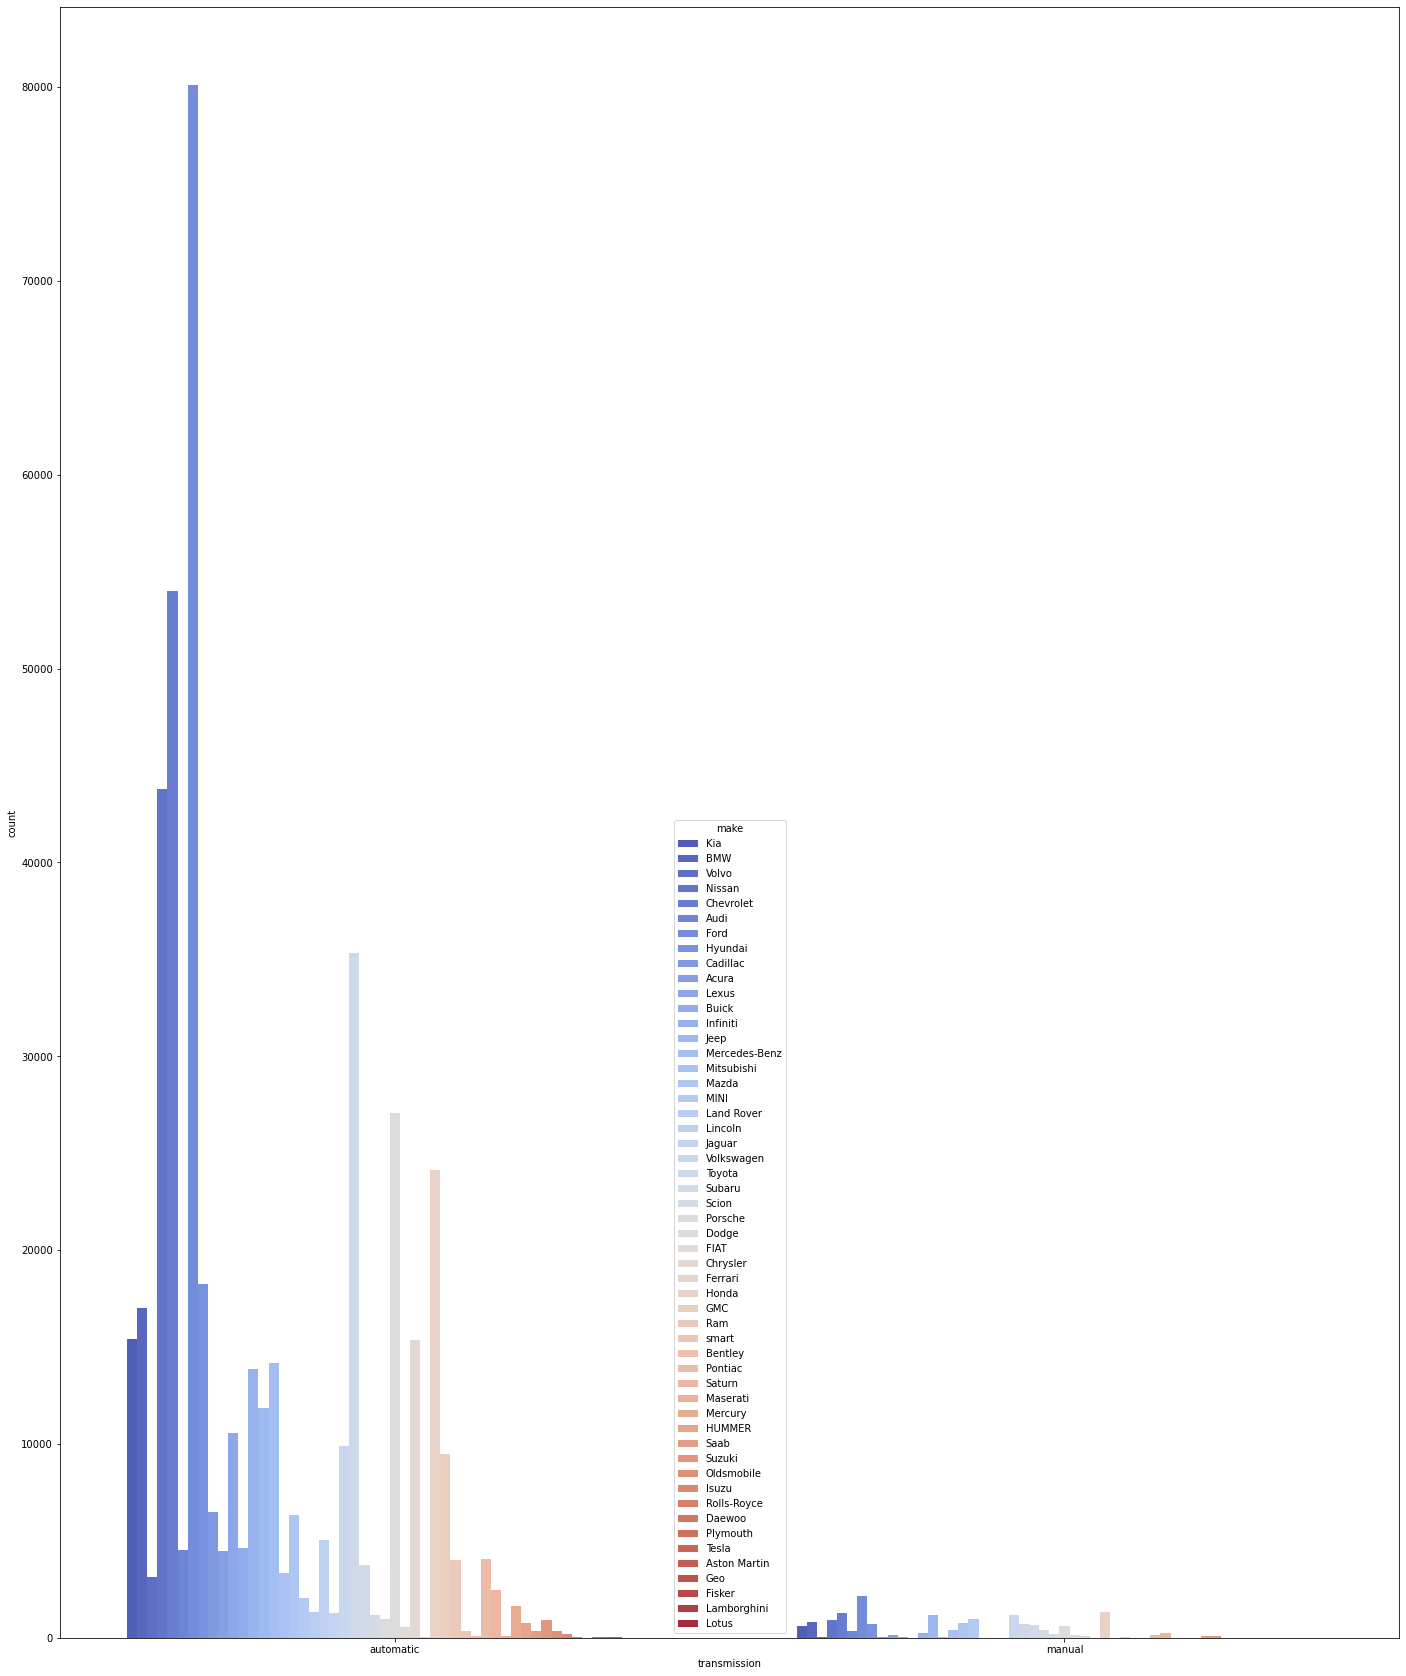

In [13]:
#Importamos la libreria matplotlib
import matplotlib.pyplot as plt
#Importamos la libreria seaborn
import seaborn as sns

fig, axes = plt.subplots(sharex=True, figsize=(24,30))
#Nombre
#Grafica del fabricante marca
#Subfiguras countplot se ubica en el eje [0, 0] - la primera hue- titulo palette - paleta de colores
sns.countplot( data=data_clean, x='transmission',hue = 'make',palette='coolwarm')
plt.show()

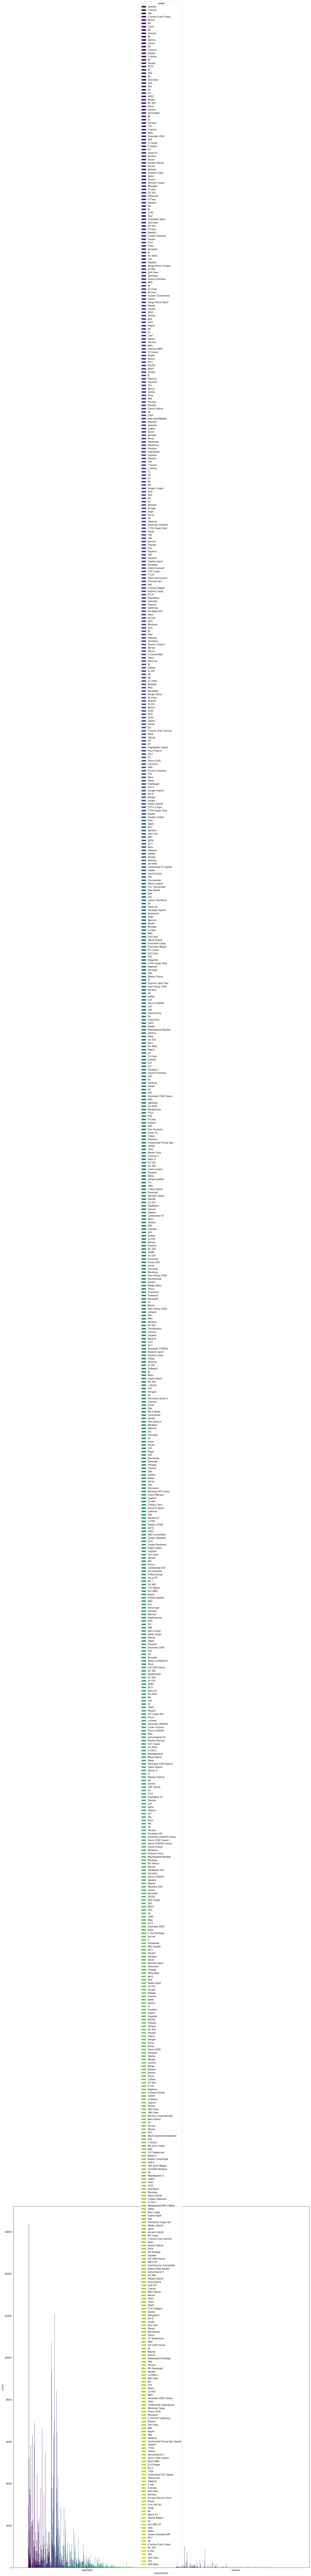

In [14]:
#Modelo del auto
fig, axes = plt.subplots(sharex=True, figsize=(24,30))
sns.countplot( data=data_clean, x='transmission',hue='model',palette='viridis')
plt.show()

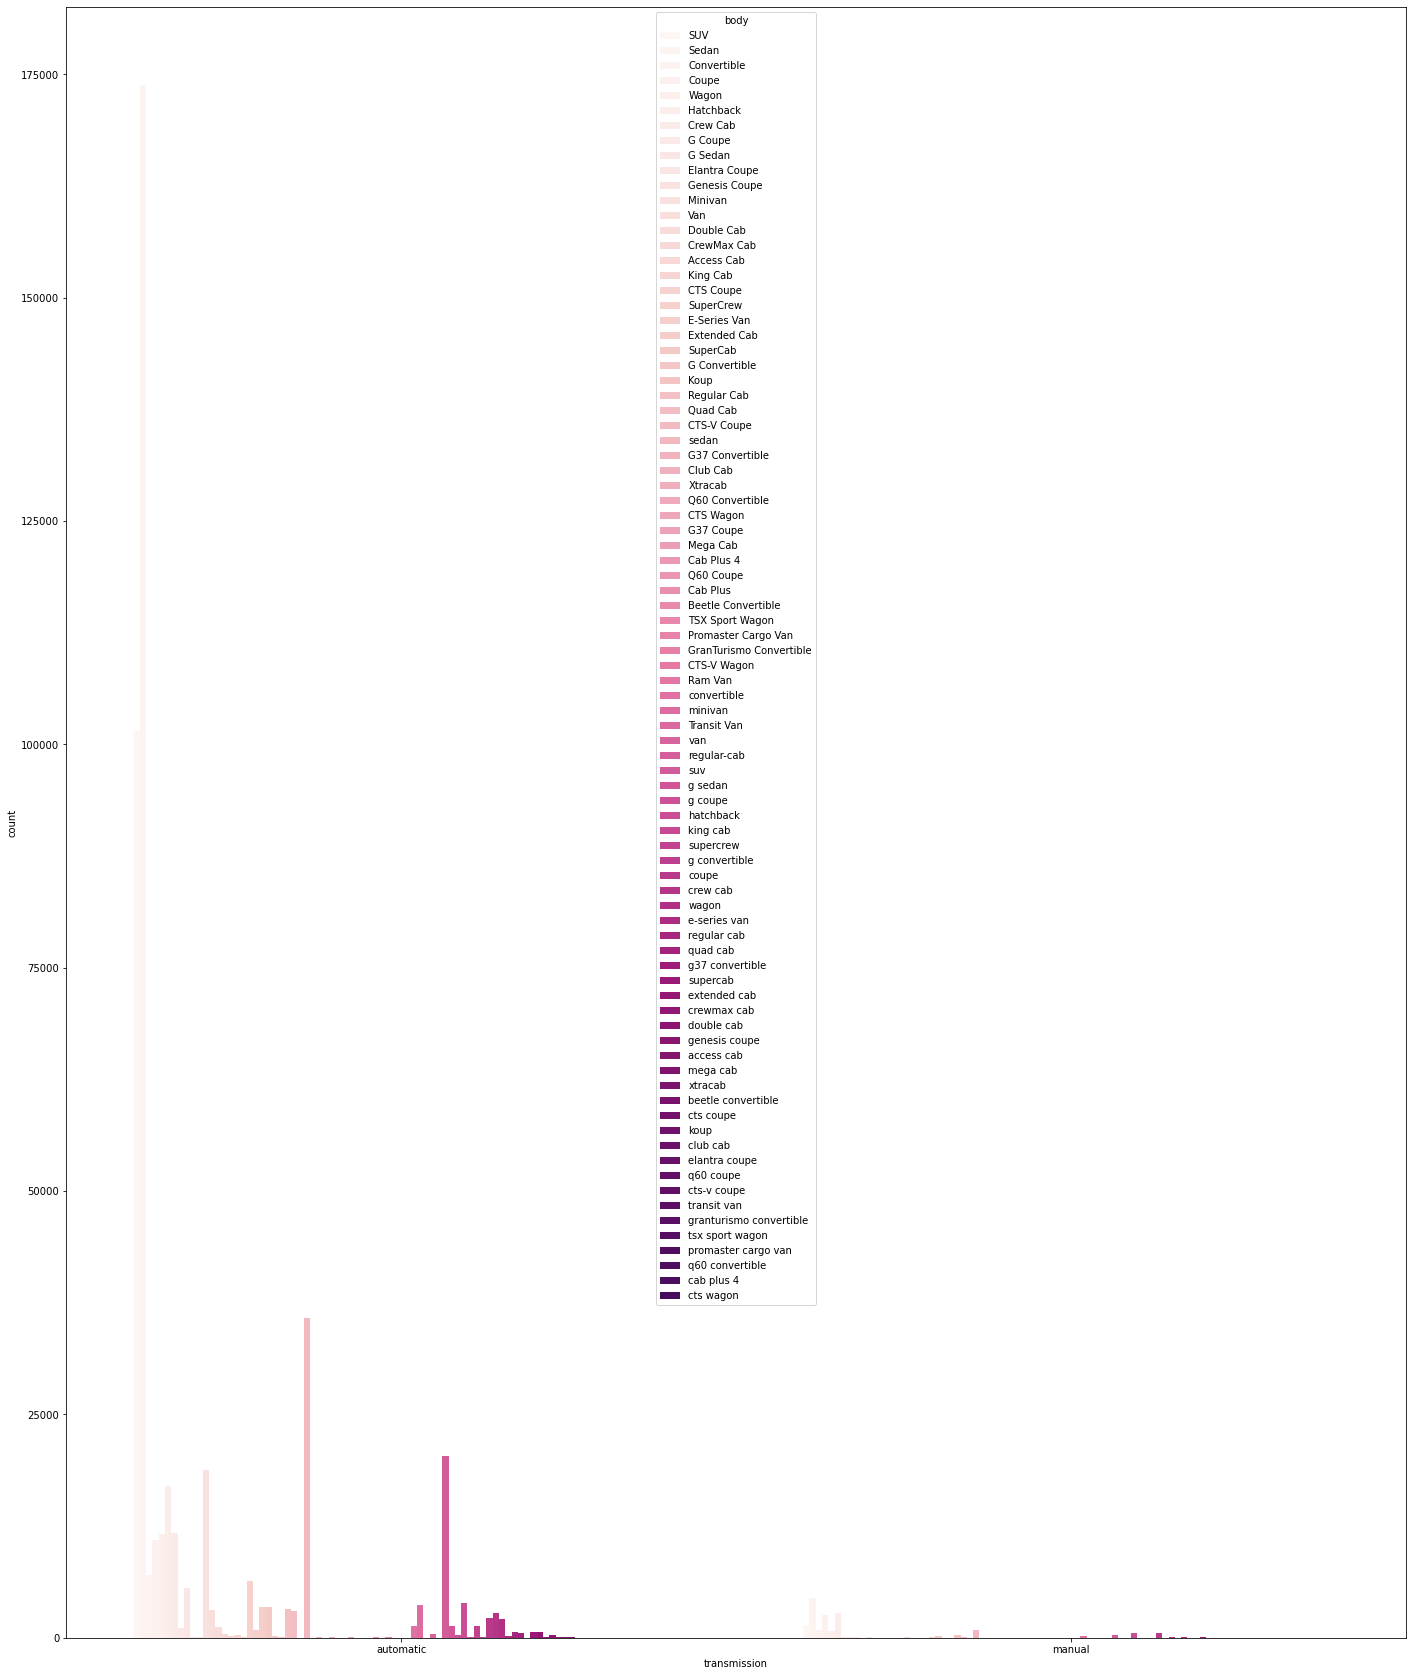

In [15]:
#tipo de cuerpo
fig, axes = plt.subplots(sharex=True, figsize=(24,30))
sns.countplot( data=data_clean, x='transmission',hue = 'body',palette='RdPu')
plt.show()

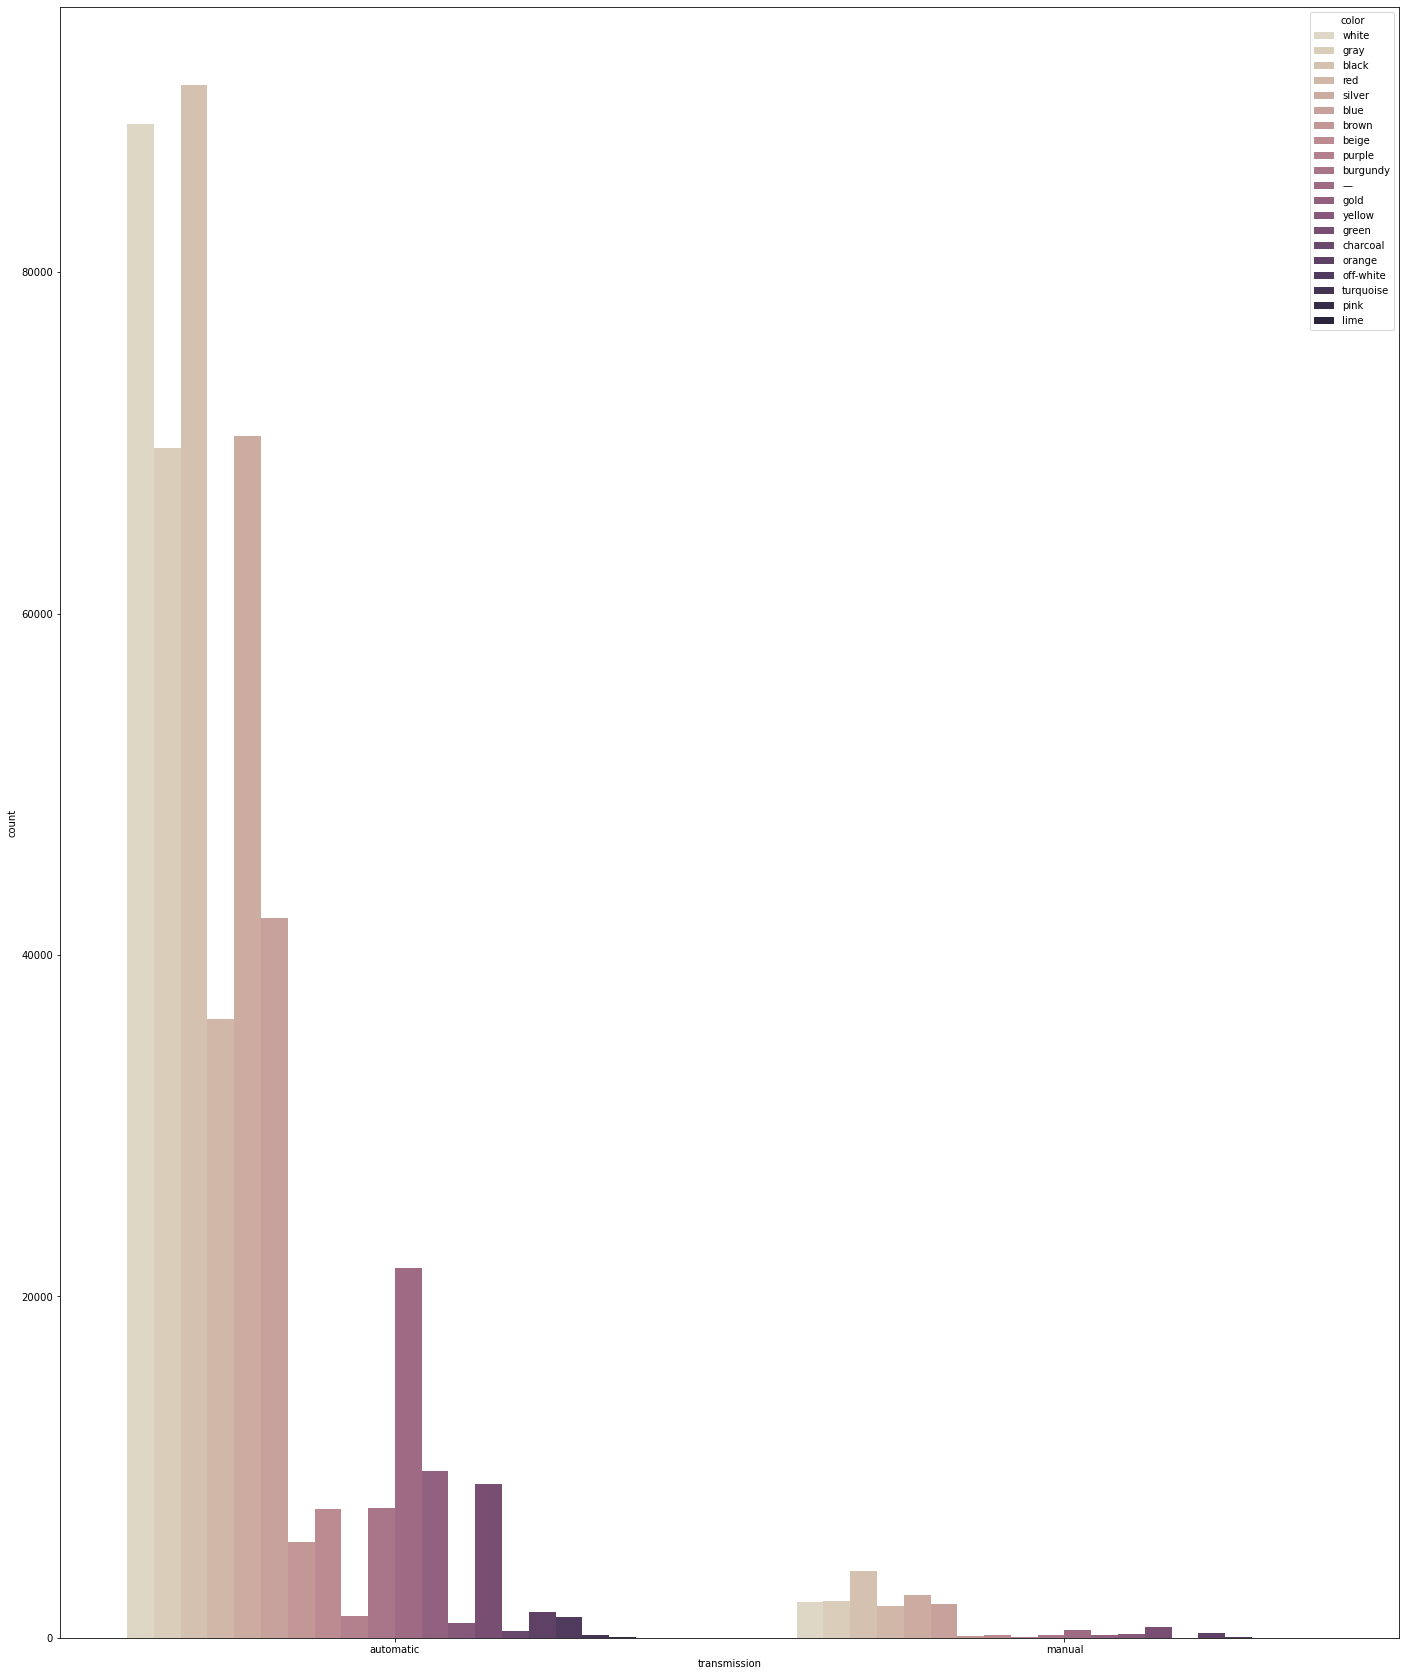

In [16]:
# segun el color
fig, axes = plt.subplots(sharex=True, figsize=(24,30))
sns.countplot( data=data_clean, x='transmission',hue = 'color',palette="ch:s=-.2,r=.6")
plt.show()

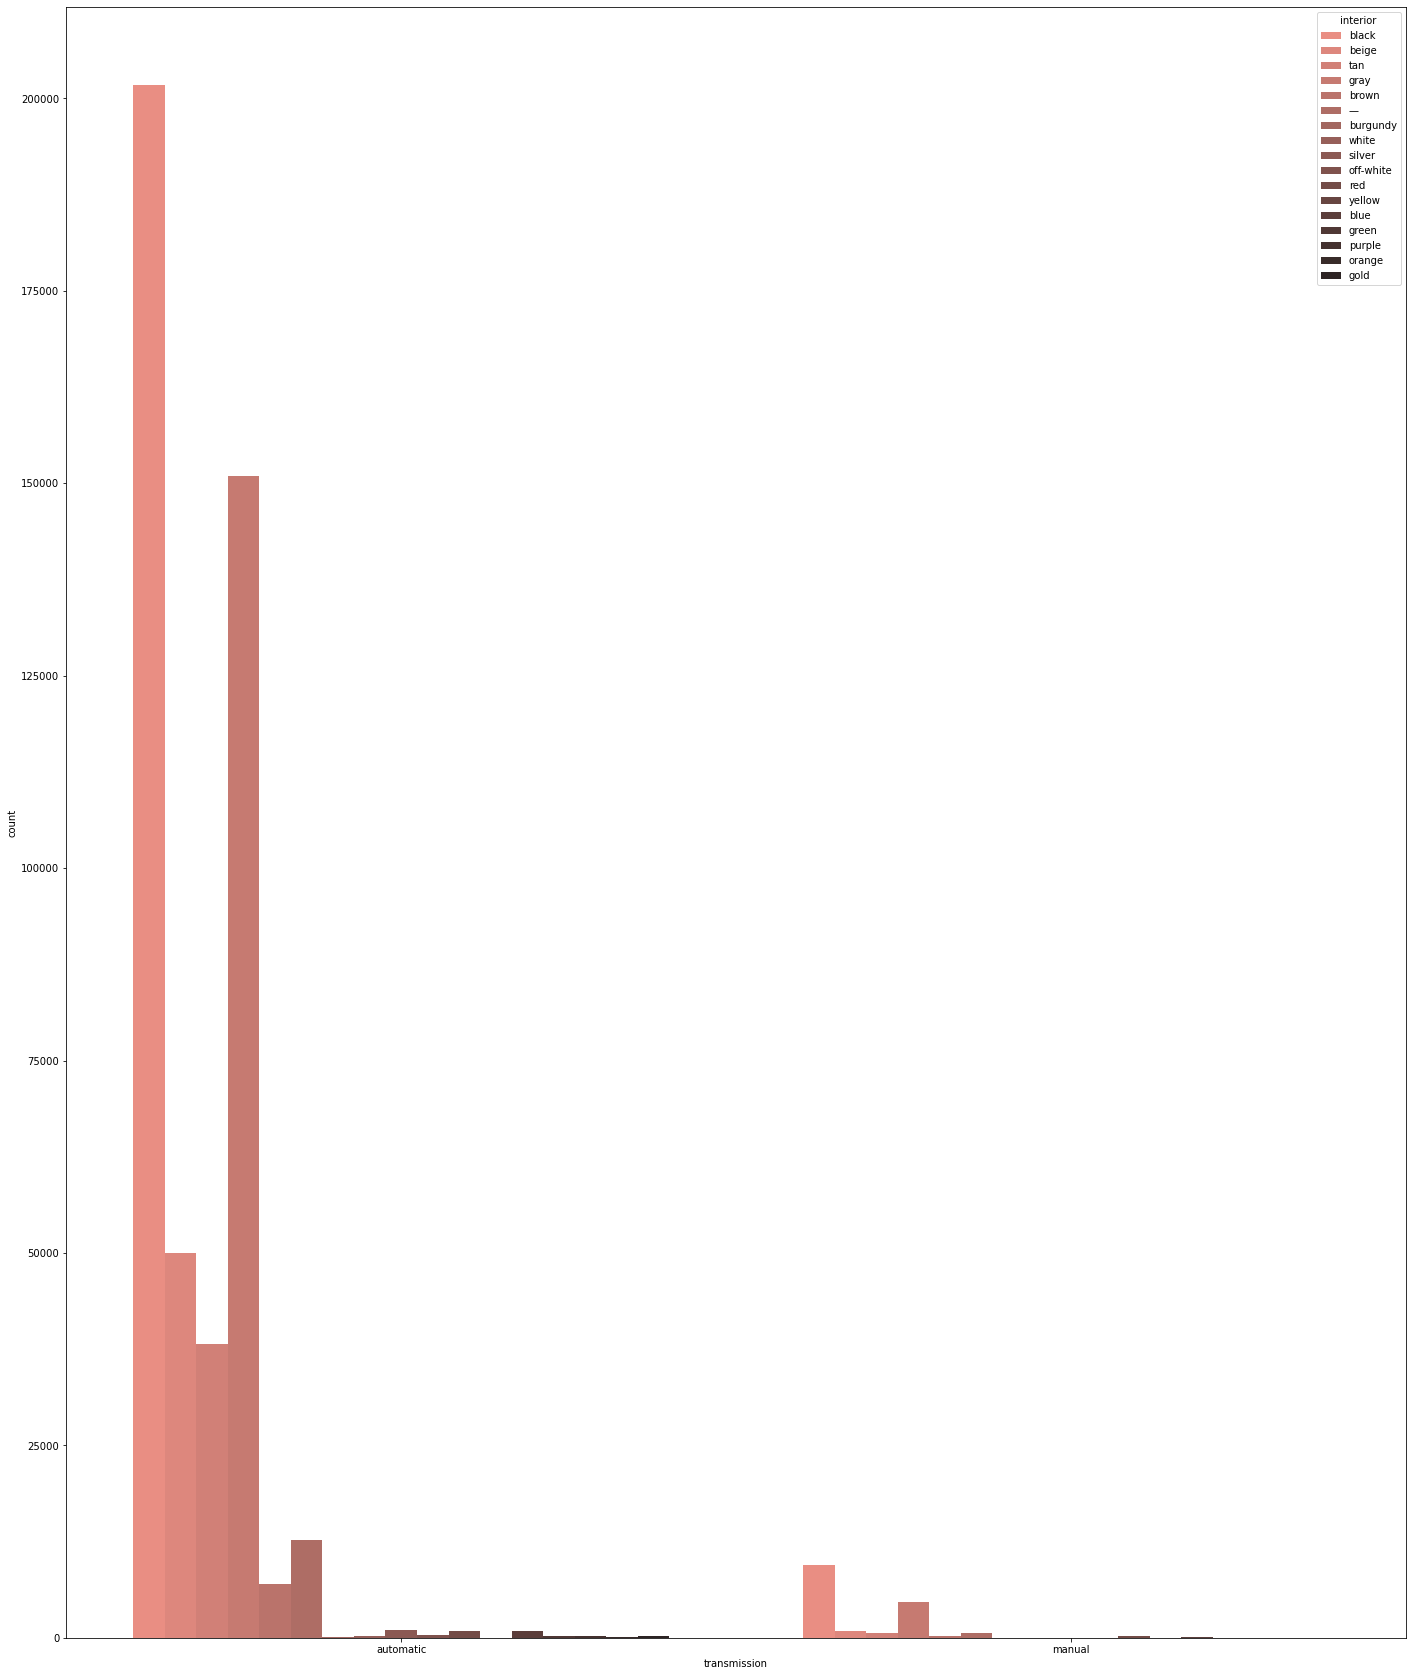

In [17]:
#color interior
fig, axes = plt.subplots(sharex=True, figsize=(24,30))
sns.countplot(data = data_clean, x ='transmission',hue = 'interior',palette="dark:salmon_r")
plt.show()

In [18]:
# vendedor no se carga los datos por la cantidad de datos de las categorias de los vendedores
#fig, axes = plt.subplots(sharex=True, figsize=(24,30))
#sns.countplot(data = data_clean, x ='transmission',hue='seller',palette="magma" )
#plt.show()

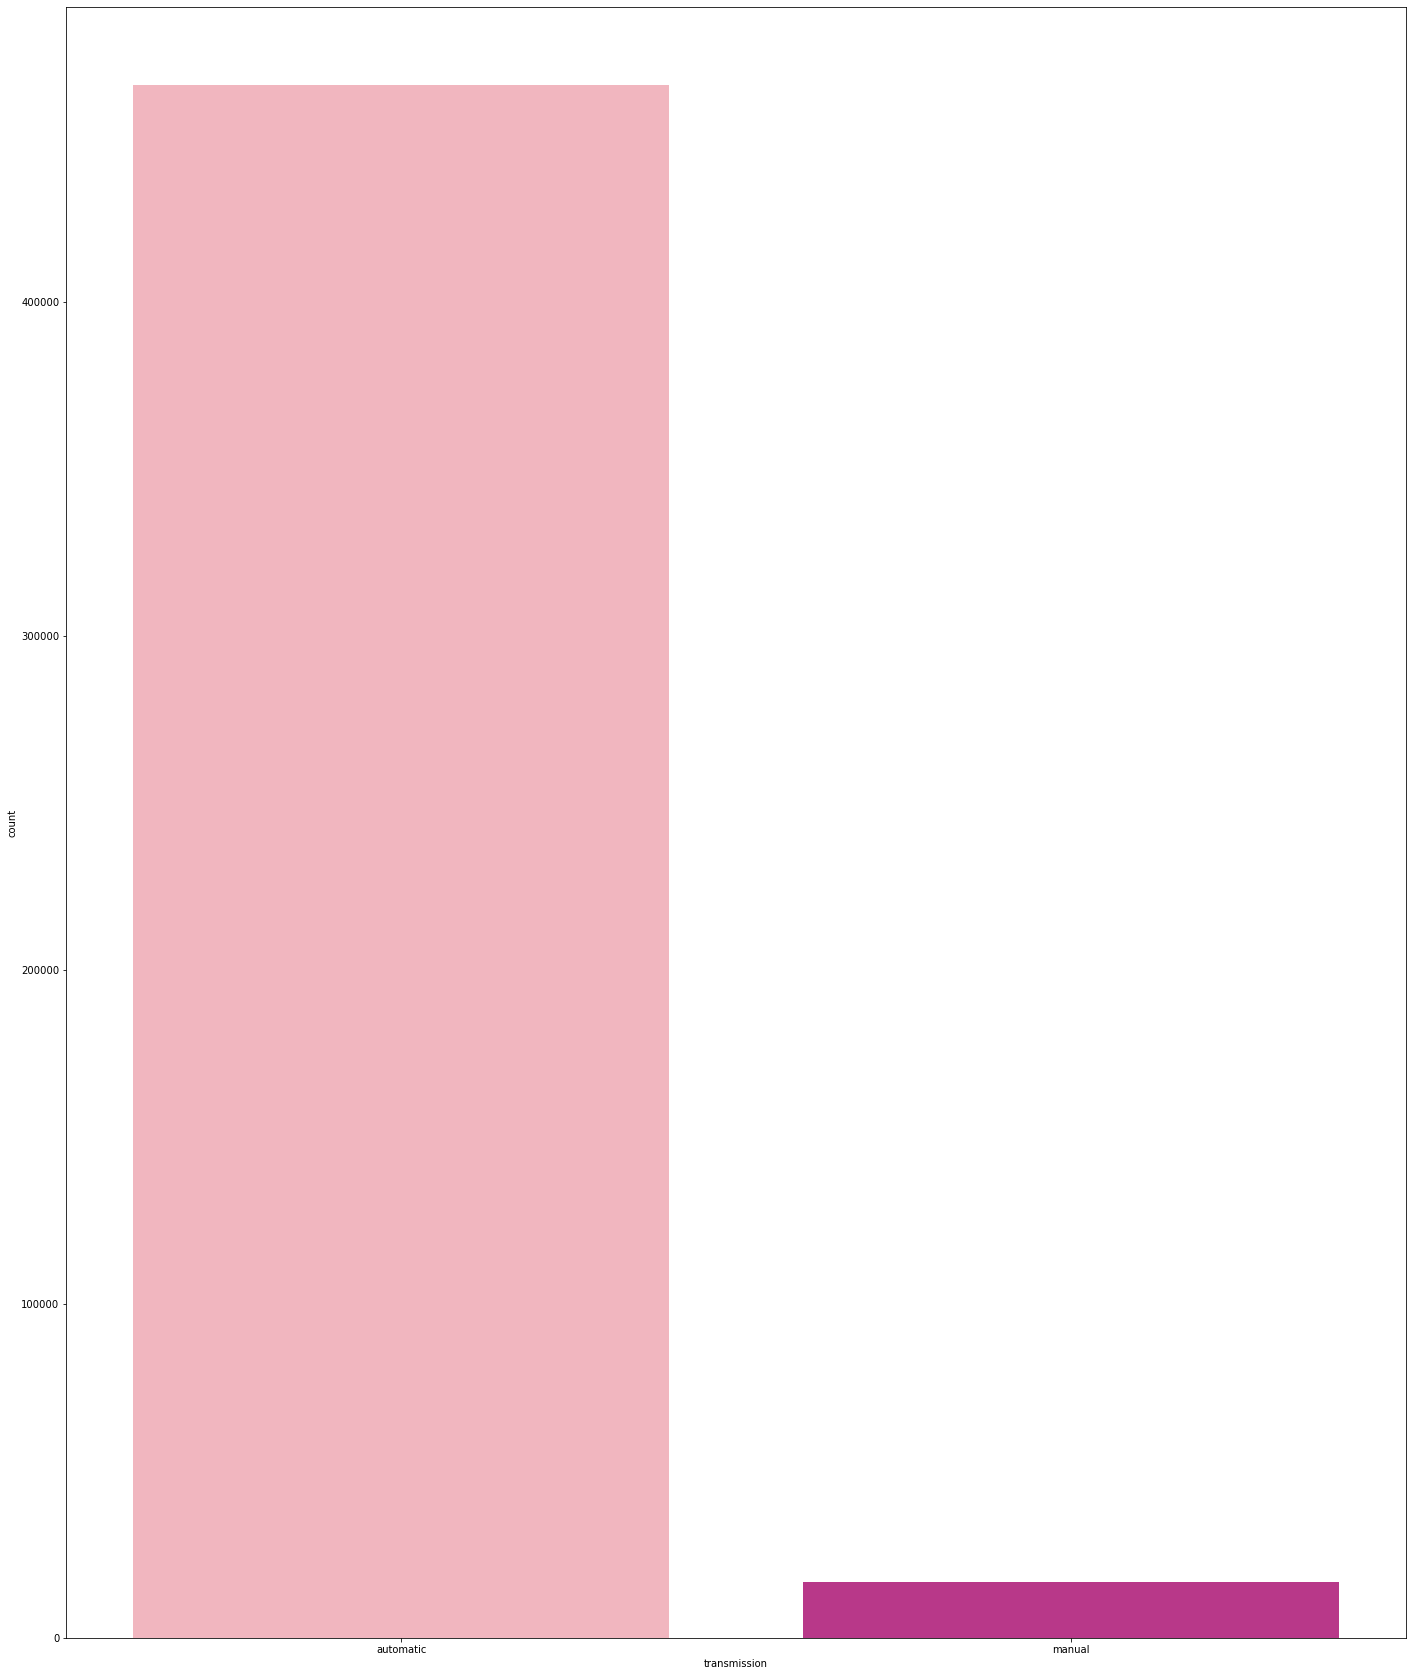

In [19]:
#tipo de transmision 
fig, axes = plt.subplots(sharex=True, figsize=(24,30))
sns.countplot(data =data_clean, x ='transmission',palette='RdPu' )
plt.show()

In [20]:
#Imprime la informacion nueva de los datos nueva para comprobar que todos tenga datos iguales
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481757 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          481757 non-null  int64  
 1   make          481757 non-null  object 
 2   model         481757 non-null  object 
 3   body          481757 non-null  object 
 4   transmission  481757 non-null  object 
 5   condition     481757 non-null  float64
 6   odometer      481757 non-null  float64
 7   color         481757 non-null  object 
 8   interior      481757 non-null  object 
 9   seller        481757 non-null  object 
 10  mmr           481757 non-null  int64  
 11  sellingprice  481757 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 63.9+ MB


In [21]:
#Imprime nunique los diferentes valores que tienen cada columna
data_clean.nunique()

year                26
make                53
model              771
body                85
transmission         2
condition           42
odometer        162978
color               20
interior            17
seller           13036
mmr               1099
sellingprice      1822
dtype: int64

In [22]:
#Instalar librerias de jupyter
!pip install sklearn


label encoder para cambiar la variables categoricas a un valor numerico 

In [23]:
#Invocan ala funcion prepocesi para utilizar el labelEncoder
from sklearn.preprocessing import LabelEncoder as LBE

In [24]:
#Cambia los datos categoricos a datos numericos con el LabelEncodeng
data_clean['make'] = LBE().fit_transform(data_clean['make'])
data_clean['model'] = LBE().fit_transform(data_clean['model'])
data_clean['body'] = LBE().fit_transform(data_clean['body'])
data_clean['transmission'] = LBE().fit_transform(data_clean['transmission'])
data_clean['color'] = LBE().fit_transform(data_clean['color'])
data_clean['interior'] = LBE().fit_transform(data_clean['interior'])
data_clean['seller'] = LBE().fit_transform(data_clean['seller'])

In [25]:
#Se verifica que todos los datos son numericos
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481757 entries, 0 to 558810
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          481757 non-null  int64  
 1   make          481757 non-null  int32  
 2   model         481757 non-null  int32  
 3   body          481757 non-null  int32  
 4   transmission  481757 non-null  int32  
 5   condition     481757 non-null  float64
 6   odometer      481757 non-null  float64
 7   color         481757 non-null  int32  
 8   interior      481757 non-null  int32  
 9   seller        481757 non-null  int32  
 10  mmr           481757 non-null  int64  
 11  sellingprice  481757 non-null  int64  
dtypes: float64(2), int32(7), int64(3)
memory usage: 51.0 MB


In [26]:
#se verifica los datos del dataset a ver si son todos con numeros
data_clean

,year,make,model,body,transmission,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,24,640,35,0,5.0,16639.0,17,1,6551,20500,21500
1,2015,24,640,35,0,5.0,9393.0,17,0,6551,20800,21500
2,2014,3,8,36,0,4.5,1331.0,7,1,4517,31900,30000
3,2015,51,578,36,0,4.1,14282.0,17,1,12612,27500,27750
4,2014,3,33,36,0,4.3,2641.0,7,1,4517,66000,67000
...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,3,25,36,0,3.9,66403.0,17,3,6851,20300,22800
558807,2012,41,6,11,0,5.0,54393.0,17,1,5880,30200,30800
558808,2012,3,725,35,0,4.8,50561.0,1,1,4517,29800,34000
558809,2015,36,63,76,0,3.8,16658.0,17,1,4178,15100,11100


Tranformamos la data en datos de entrenamiento y prueba

In [27]:
#Importa las librerias para model_seleccion
from sklearn.model_selection import train_test_split
#Selecciona los valores independientes y dependientes
X = data_clean.drop('transmission',axis=1)
Y = data_clean['transmission']
#Hacemos el split de datos de prueba y de test tomando el 25% de los datos para el test con una aleatriedad de cero(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Estandarizamos la informacion 

In [28]:
#importa las funcion estandarScaler para estandarizar los datos 
from sklearn.preprocessing import StandardScaler
#Se denomina una variable sc
sc = StandardScaler()

#Estadarizar los datos de entrenamiento y los datos de test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Aplicamos el algoritmo de naive Bayes

In [29]:
#importa las librerias de naive Bayes
from sklearn.naive_bayes import GaussianNB
#se guarda el clasificador  NB en la variable classifier
classifier = GaussianNB()
#Aqui se ocupa la opcion fit para entrenar los datos de NB 
classifier.fit(X_train, y_train)

GaussianNB()

Invocamos las metricas para evaluar el modelo


In [30]:
#Importamos los datos para el accuracy 
from sklearn.metrics import accuracy_score
#Aplicamos el algoritmo para predicir los datos de prueba para el accuracy
y_pred_bayes = classifier.predict(X_test)
#Guardamos el accuracy en la variable que se denomino acc
acc = accuracy_score(y_test, y_pred_bayes)
#imprimimos el resultado de la pocision 
print(f"Accuracy score : {acc}")
#imprimimos el resultado en porcentaje de precision
print(f"porcentaje de Accuracy score : {acc * 100}%")

Accuracy score : 0.9547658585187645
porcentaje de Accuracy score : 95.47658585187645%


##Matriz de Confusion

In [31]:
#Intalar las librerias
!pip install seaborn
#confusion_matrix  libreria sklearn
from sklearn.metrics import confusion_matrix
#  acurracy_score  libreria sklearn
from sklearn.metrics import accuracy_score
import seaborn as sns


In [32]:
#Para mostrar los valores de  la matriz de confuncion
print(confusion_matrix(y_test, y_pred_bayes))


[[114808   1482]
 [  3966    184]]


<AxesSubplot:>

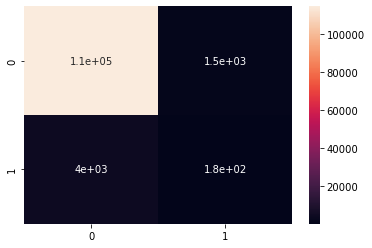

In [33]:
# Presentamos de forma estetica la matriz de confución con un mapa de calor
sns.heatmap(confusion_matrix(y_test, y_pred_bayes), annot=True)

#Hiden Markov Models

In [34]:
#Intalar las librerias de hmmlearn para generar los modellos ocultos de Markov
!pip install hmmlearn


In [35]:
#Llamar al modolu de hmn
from hmmlearn import hmm
# Instanciamos el modelo Hidden Markov Model
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 1000, random_state = 50)
# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train)

GaussianHMM(n_components=2, n_iter=1000, random_state=50)

In [36]:
# realizamos la prueba de predicción del model
y_pred_Markov = model.predict(X_test)

In [37]:
#El resultado que da segun la cantidad de los datos de los test
y_pred_Markov

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [38]:
#Evaluar el accuracy
from sklearn import metrics
#imprimir el resultao
print("Accuracy Hidden Markov Model:")
acc_hmn=metrics.accuracy_score(y_test, y_pred_Markov)
#imprimimos el resultado de la pocision 
print(f"Accuracy score : {acc_hmn}")
#imprimimos el resultado en porcentaje de precision
print(f"porcentaje de Accuracy score : {acc_hmn * 100}%")


Accuracy Hidden Markov Model:
Accuracy score : 0.6130106276984391
porcentaje de Accuracy score : 61.30106276984391%


##Matriz de Confusion 

In [39]:
#confusion_matrix  libreria sklearn
from sklearn.metrics import confusion_matrix
#  acurracy_score  libreria sklearn
from sklearn.metrics import accuracy_score
import seaborn as sns
#Para mostrar los valores de  la matriz de confuncion
print(confusion_matrix(y_test, y_pred_Markov))



[[71583 44707]
 [ 1902  2248]]


<AxesSubplot:>

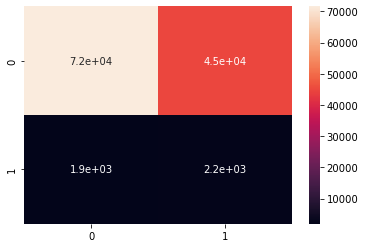

In [40]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_Markov), annot=True)

#Probabilistic fuzzy Logic

In [41]:
#Instalacion de scikit-fuzzy logica difusa
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
#Importar la funcion control logica difusa para crear sistema de control
from skfuzzy import control as ctrl

In [42]:
#imprime los valores maximo de condicion y mmr(caracteristica de los vehiculos carga maxima q puede remolcar el auto)
#para generar los rangos de las funciones de membreca
print(data_clean['condition'].max())
print(data_clean['mmr'].max())

5.0
182000


In [43]:
#imprime los valores minimos de condicion y mmr(caracteristica de los vehiculos carga minimos q puede remolcar el auto)
#para generar los rangos de las funciones de membreca
print(data_clean['condition'].min())
print(data_clean['mmr'].min())

1.0
25


colocamos las funciones de menbresia

In [44]:
#creamos las funciones de membresia para la condicion de mmr
condition = ctrl.Antecedent(np.arange(1, 5, 0.1), 'condition')
MMR = ctrl.Antecedent(np.arange(25, 182000, 1), 'mmr')
#creamos la funcion d emembresia para el tipo de transmicion si es automatica o manual
Trasm = ctrl.Consequent(np.arange(0, 10, 1), 'Trasm')


In [45]:
#Se crea los 3 rangos de las funciones
condition.automf(3)
MMR.automf(3)
Trasm.automf(3)
##Determinamos el conjunto universo y la correspondiente consecuencia (tipo de trasnmision)
Trasm['Trams_Automatic'] = fuzz.trimf(Trasm.universe, [0, 0,4])
Trasm['Trams_Manual'] = fuzz.trimf(Trasm.universe, [0,4,5])
Trasm['Trams_Manual'] = fuzz.trimf(Trasm.universe, [4,5,10])



C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


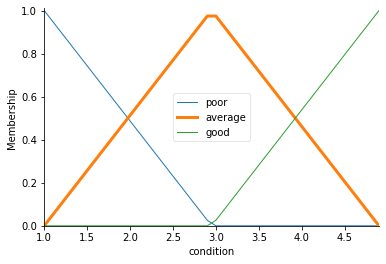

In [46]:

#grafica la uncion de membresia de la condicion
condition['average'].view()


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


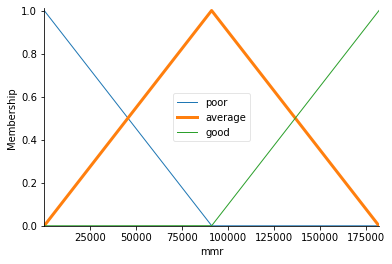

In [47]:

MMR['average'].view()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


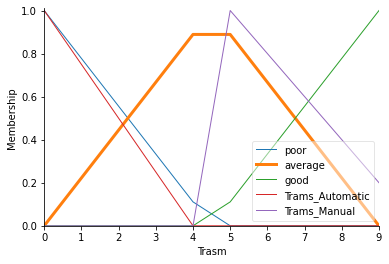

In [48]:
#muestra la probabilidad 
Trasm['average'].view()

Proponemos las reglas difusas

In [49]:
#Reglas
rule1 = ctrl.Rule(condition['poor'] | MMR['poor'], Trasm['Trams_Automatic'])
#condicion meia la capacidad del auto es buena entonces es manual
rule2 = ctrl.Rule(condition['average']& MMR['good']  , Trasm['Trams_Manual'])
rule3 = ctrl.Rule(  condition['good']  | MMR['good'] , Trasm['Trams_Manual'])
#se une las reglas en funcion de sistema de control
trams_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
#Simula la función de control (aplica las funciones de control en los sistemas de control)
trams_sis = ctrl.ControlSystemSimulation(trams_ctrl)

Colocamos las correspondientes entradas

In [50]:
#Agrega las entradas correspondientes al sistema de control va de 1 a 5 mmr rangos altos
trams_sis.input['condition'] = 4.7
trams_sis.input['mmr'] = 150000
#ejecut el sistema de control
trams_sis.compute()

6.241911549069634


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


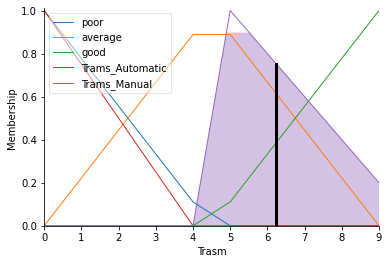

In [51]:
#Imprime la respuesta de tipo transmicion, en un intervalo de 1 a 4 automatico, de 4 a 6 manual
print(trams_sis.output['Trasm'])
Trasm.view(sim=trams_sis)
#6.24 muestra la probabilidad que sea automatica que sea automatico y manual

In [52]:
#Es mejor el de Bayes por que tiene q ver con las condicionalidades de cada una de las variables sin importar el tiempo(si es automatico o manual no importa el orden) 
#markov series temporales si importa porque se ve que paso antes 
#Logica difusa es menos probable xq las condiciones se pone nosotros.